### TASK_1:  IRIS FLOWER CLASSIFICATION

Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements. Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the
measurements of the iris species and classify them.

In [25]:
import pandas as pd
import numpy as np

In [26]:
#Load the dataset
df=pd.read_csv("Iris.csv")

In [27]:
#The top 5 records from the given dataset are seen
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [29]:
#columns of dataset
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [30]:
#no.of rows and columns
df.shape

(150, 6)

In [31]:
#Types of species and their counts
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

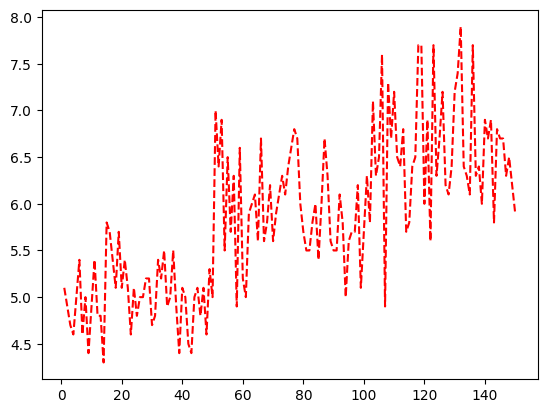

In [87]:
import matplotlib.pyplot as plt
plt.plot(df.Id, iris["SepalLengthCm"], "r--")
plt.show()

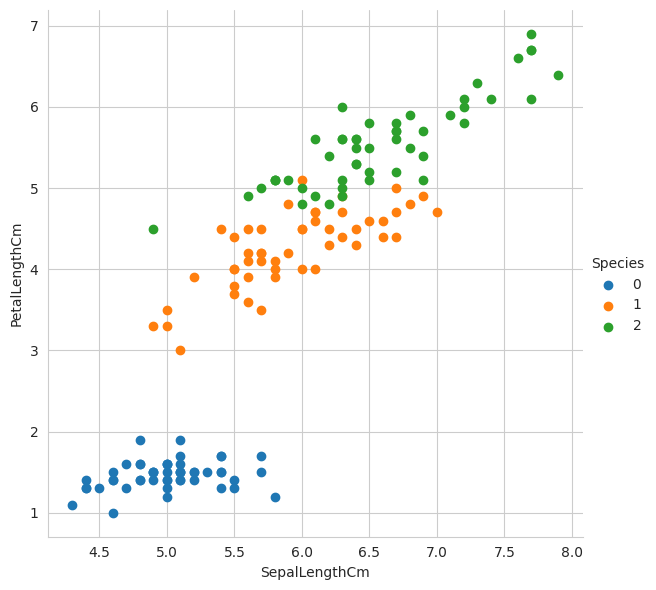

In [113]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue ="Species",
              height = 6).map(plt.scatter,
                              'SepalLengthCm',
                              'PetalLengthCm').add_legend()
plt.show()

In [89]:
df.isnull().sum().sum() #checking for missing values or null values

0

In [33]:
#Total duplicates in the dataset
df.duplicated().sum()

0

In [46]:
#Converting the categorical data to numeric by encoding processes
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

df['Species'] = encoder.fit_transform(df['Species'])

In [48]:
#Dividing the whole transformed data to independent and dependent variables
x=df.drop(["Id","Species"],axis=1)
y=df['Species']

In [49]:
x.shape    

(150, 4)

In [51]:
y.shape    

(150,)

In [53]:
#The top 5 records in independent variable data
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [54]:
#The top 5 records in dependent variable data
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [57]:
#Splitting the data into train and test data for model building and model evaluation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [59]:
#The data present in the training data of independent variables dataframe
x_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
4,5.0,3.6,1.4,0.2
32,5.2,4.1,1.5,0.1
142,5.8,2.7,5.1,1.9
85,6.0,3.4,4.5,1.6
86,6.7,3.1,4.7,1.5


In [60]:
#The data present in the training data of dependent variable dataframe
y_train.head()

4      0
32     0
142    2
85     1
86     1
Name: Species, dtype: int64

In [61]:
#The data present in the testing data of independent variables dataframe
x_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [62]:
#The data present in the testing data of dependent variable dataframe
y_test.head()

73     1
18     0
118    2
78     1
76     1
Name: Species, dtype: int64

In [63]:
#Model Building
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=8)

In [64]:
#Making the model to learn by giving the training data
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [65]:
#Obtaining the predictions from the trained model
y_pred=classifier.predict(x_test)

In [66]:
#Assessing the performance of model with the confusion matrix
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
result=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:-")
print(result)

Confusion Matrix:-
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [67]:
#The classification report
result1=classification_report(y_test,y_pred)
print("Classification Report:-")
print(result1)

Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [75]:
#Overall accuracy of a model
result2=accuracy_score(y_test,y_pred)
print("Accuracy Score:-")
print(result2)

Accuracy Score:-
1.0


In [76]:
#The values in the testing data of a dependent variable
y_test.values

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [77]:
#The values obtained by predictions
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [78]:
#Comparision of predicted and original values and initialising the values of some columns with false 
df2=pd.DataFrame({'Test_Values':y_test.values,'Predicted_Values':y_pred,'Correct_Values':False,"Wrong_Values":False})
df2.head()

,Test_Values,Predicted_Values,Correct_Values,Wrong_Values
0,1,1,False,False
1,0,0,False,False
2,2,2,False,False
3,1,1,False,False
4,1,1,False,False


In [79]:
#Modifying the columns as required based on the original constraints
import warnings
warnings.filterwarnings('ignore')

for i in df2.index:
    if df2['Test_Values'][i]==df2['Predicted_Values'][i]:
        df2['Correct_Values'][i]=True
    else:
        df2['Wrong_Values'][i]=True
df2.head()

,Test_Values,Predicted_Values,Correct_Values,Wrong_Values
0,1,1,True,False
1,0,0,True,False
2,2,2,True,False
3,1,1,True,False
4,1,1,True,False
